In [7]:
# 前準備
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

# グラフの線の種類
linestyles = ['-', '--', ':']

# 期待値
def E(X, g=lambda x: x):
    x_set, f=X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

# 分散
def V(X, g=lambda x: x):
    x_set, f=X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# 確率変数を引数とし、その確率が確率の性質を満たしているか確認する
# 期待値と分散を求める
def check_prob(X):
    x_set, f=X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), '負の確率があります'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'確率の和が{prob_sum}になりました'
    print(f'期待値は{E(X): .4}')
    print(f'分散は{V(X): .4}')
    
# 確率関数を引数に、確率変数の確率関数と期待値を図示する
def plot_prob(X):
    x_set, f=X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

In [8]:
# ベルヌーイ分布の確率変数を求める
# →0か1かしか取らない離散型確率(e.g. コインの表裏など)
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0;
    return x_set, f

In [9]:
p = 0.3
X = Bern(p)

In [10]:
check_prob(X)

期待値は 0.3
分散は 0.21


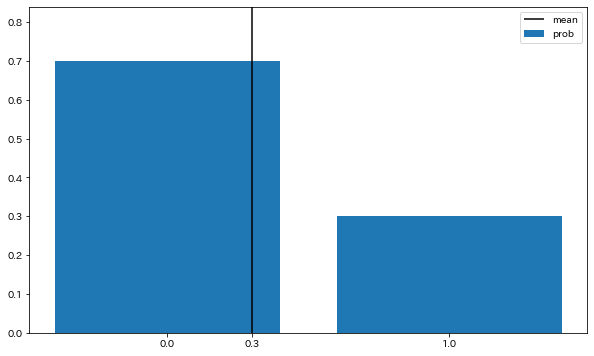

In [11]:
plot_prob(X)